In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# H&M clothes

In [109]:
df_HM_clothes = pd.read_csv("data_h&m_tendnace_clothes.csv")

In [110]:
df_HM_clothes.head()

,Unnamed: 0,product_id,gender,clothes,color,price
0,0,1166969003,FEMME,Robe,Cream/Floral,"\r\n 39,99 €"
1,1,1142215002,FEMME,Blouse,Noir,"\r\n 49,99 €"
2,2,1159122003,FEMME,Robe,Vert,"\r\n 59,99 €"
3,3,1159122001,FEMME,Robe,Noir,"\r\n 59,99 €"
4,4,1157667001,FEMME,Robe,Noir,"\r\n 79,99 €"


In [111]:
df_HM_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1095 non-null   int64 
 1   product_id  1095 non-null   int64 
 2   gender      1095 non-null   object
 3   clothes     1095 non-null   object
 4   color       1095 non-null   object
 5   price       1095 non-null   object
dtypes: int64(2), object(4)
memory usage: 51.5+ KB


## Clean Data_frame_clothes

In [112]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_clothes.drop(columns = "Unnamed: 0", inplace = True)

#nettoyer la colonne price et modifier le  type en float
df_HM_clothes['price'] = df_HM_clothes['price'].astype(str)
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace(',', '.')
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace('\r\n','')
df_HM_clothes['price'] = df_HM_clothes['price'].str.replace('€','')
df_HM_clothes['price'] = df_HM_clothes['price'].astype(float)
df_HM_clothes.rename({'price':'price (€)'})
# modifier le type de product_id en string
df_HM_clothes['product_id'] = df_HM_clothes['product_id'].astype(str)

#Mettre les champs en minuscules
df_HM_clothes = df_HM_clothes.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_clothes.rename(columns=lambda x: x.lower(), inplace=True)


df_HM_clothes.head()

,product_id,gender,clothes,color,price
0,1166969003,femme,robe,cream/floral,39.99
1,1142215002,femme,blouse,noir,49.99
2,1159122003,femme,robe,vert,59.99
3,1159122001,femme,robe,noir,59.99
4,1157667001,femme,robe,noir,79.99


In [113]:
df_HM_clothes["clothes"].unique()

array(['robe', 'blouse', 'lace', 'sandales', 'longue', 'crop', '90s',
       'short', 'top', 'maillot', 'haut', 'bas', 'jupe', 'lot', 'chemise',
       'blazer', 'textured-weave', 'débardeur', 'bob', 'combi-pantalon',
       'pantalon', 'minijupe', 'claquettes', 'tongs', 't-shirt',
       'bermuda', 'cuissard', 'ensemble', 'h&m+', 'espadrilles', 'caraco',
       'soutien-gorge', 'legging', 'jupe-culotte', 'slim', 'body',
       'salopette', 'sneakers', 'body-string', 'v-neck', 'foulard',
       'broderie', 'chaussures', 'draped', 'long-sleeved', 'brassière',
       'grand', 'padded', 'flared', 'escarpins', 'chapeau', 'linen-blend',
       'tennis', 'polo', 'skinny', 'loose-knit', 'mini',
       'foulard/bandeau', 'pointelle-knit', 'casquette', 'wedge-heeled',
       'pull', 'combi-short', 'combinaison', 'low', 'panty', 'tapered',
       'chino', 'bomber', 'hoodie', 'pyjama', 'boxer', 'sweat', 'veste'],
      dtype=object)

In [114]:
# Créez un dictionnaire pour mapper les éléments de la colonne 'clothes' à leurs catégories correspondantes
category_mapping = {
    'robe': 'Hauts', 'blouse': 'Hauts', 'lace': 'Hauts', 'crop': 'Hauts', 'top': 'Hauts', 'maillot': 'Sous-vêtements',
    'haut': 'Hauts', 'chemise': 'Hauts', 'blazer': 'Hauts', 'débardeur': 'Hauts', 't-shirt': 'Hauts',
    'caraco': 'Sous-vêtements','polo': 'Hauts', 'pull': 'Hauts', 'hoodie': 'Hauts', 'sweat': 'Hauts', 'veste': 'Hauts',
    '90s':'Bas','lot':'Sous-vêtements', 'textured-weave':'Hauts','bob':'Accessoires','combi-pantalon':'Combinaisons',
     'claquettes':'Chaussures','tongs':'Chaussures','ensemble':'Sous-vêtements','h&m+':'Hauts','espadrilles':'Chaussures',
    'sneakers':'Chaussures','v-neck':'Hauts','foulard':'Accessoires','broderie':'Hauts','chaussures':'Chaussures',
    'draped':'Hauts','long-sleeved':'Hauts', 'escarpins':'Chaussures','chapeau':'Accessoires','linen-blend':'Hauts',
    'longue': 'Bas', 'short': 'Bas', 'bas': 'Bas', 'jupe': 'Bas', 'minijupe': 'Bas', 'pantalon': 'Bas','flared':'Bas',
    'bermuda': 'Bas', 'cuissard': 'Bas', 'legging': 'Bas', 'jupe-culotte': 'Bas', 'slim': 'Bas', 'salopette': 'Bas',
    'chino': 'Bas', 'tapered': 'Bas', 'skinny': 'Bas', 'bomber': 'Hauts','grand':'Accessoires','padded':'Sous-vêtements',
    'tennis':'Chaussures','loose-knit':'Hauts','mini':'Hauts','foulard/bandeau':'Accessoires','pointelle-knit':'Bas',
    'casquette':'Accessoires','wedge-heeled':'Chaussures','combi-short':'Bas','combinaison':'Combinaisons','low':'Bas',
    'panty':'Sous-vêtements','pyjama':'Sous-vêtements','boxer':'Sous-vêtements',
    'soutien-gorge': 'Sous-vêtements', 'body': 'Hauts', 'body-string': 'Hauts','brassière':'Hauts','sandales':'Chaussures' }

df_HM_clothes['clothes'] = df_HM_clothes['clothes'].replace(category_mapping)
df_HM_clothes.rename(columns = {"clothes":"categories_clothes"} , inplace=True)
df_HM_clothes.categories_clothes.unique()

array(['Hauts', 'Chaussures', 'Bas', 'Sous-vêtements', 'Accessoires',
       'Combinaisons'], dtype=object)

In [115]:
df_HM_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1095 non-null   object 
 1   gender              1095 non-null   object 
 2   categories_clothes  1095 non-null   object 
 3   color               1095 non-null   object 
 4   price               1095 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.9+ KB


## DATA Visualisation 

Text(0.5, 0, 'prix')

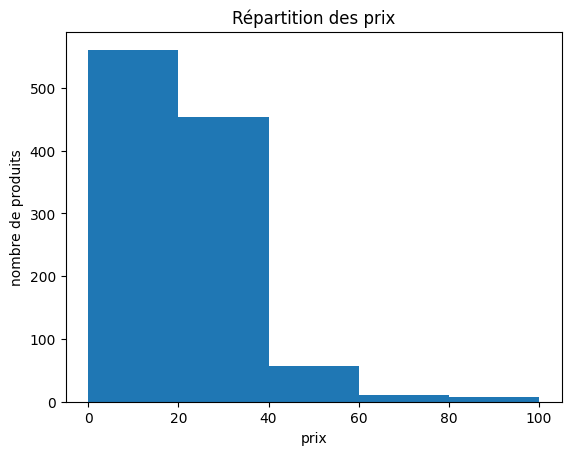

In [116]:
plt.hist(df_HM_clothes["price"], bins = 5, range = (0,100))
plt.title("Répartition des prix")
plt.ylabel("nombre de produits")
plt.xlabel("prix")

# H&M compositions

In [117]:
df_HM_composition = pd.read_csv("data_h&m_tendance_compo.csv")

In [118]:
df_HM_composition.head()

,Unnamed: 0,product_id,layer,material,percentage
0,0,1166969003,Doublure,Polyester,100.0
1,1,1166969003,Couche extérieure,Polyester,100.0
2,2,1166969003,Bordure,Polyester,100.0
3,3,1142215002,Doublure,Polyester,100.0
4,4,1142215002,Couche extérieure,Polyester,61.0


In [119]:
df_HM_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2159 non-null   int64  
 1   product_id  2159 non-null   int64  
 2   layer       1295 non-null   object 
 3   material    2159 non-null   object 
 4   percentage  2159 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 84.5+ KB


## Clean Data_frame_compositions

In [120]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_composition.drop(columns = "Unnamed: 0", inplace = True)

# modifier le type de product_id en string
df_HM_composition['product_id'] = df_HM_composition['product_id'].astype(str)

#changer le matériaux cuir velours en cuir
df_HM_composition.loc[df_HM_composition["material"] == "cuir velours", "material"] = "cuir"

#Mettre les champs en minuscules
df_HM_composition = df_HM_composition.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_composition.rename(columns=lambda x: x.lower(), inplace=True)

#remplacer les nan par matière principale
df_HM_composition["layer"] = df_HM_composition["layer"].fillna('matière principale')


df_HM_composition.head()

,product_id,layer,material,percentage
0,1166969003,doublure,polyester,100.0
1,1166969003,couche extérieure,polyester,100.0
2,1166969003,bordure,polyester,100.0
3,1142215002,doublure,polyester,100.0
4,1142215002,couche extérieure,polyester,61.0


In [121]:
df_HM_composition["layer"].unique()

array(['doublure', 'couche extérieure', 'bordure', 'semelle intérieure',
       'semelle extérieure', 'doublure de poche', 'matière principale',
       'détails', 'broderie', 'dessus', 'couche intérieure', 'taille',
       'dentelle', 'doublure de bonnet', 'filet',
       'doublure intérieure entrejambe', 'maille', 'côté', 'semelle',
       'côté, doublure', 'poche', 'doublures', 'enduit', 'matelassé',
       'ceinture', 'bas', 'devant', 'doublure de manche', 'base', 'haut',
       'doublure et semelle intérieure', 'dos', 'galon'], dtype=object)

** Remarques :** On a trop de catégorie layer on va les regroupement en fonction de leur rôle dans le vêtements

In [122]:
# Créer un dictionnaire pour les modifications
replacement_dict = {
    'couche extérieure': 'matière principale',
    'couche intérieure': 'matière principale',
    'maille': 'matière principale',
    'enduit': 'matière principale',
    'matelassé': 'matière principale',
    'dessus': 'matière principale',
    'doublure': 'doublure',
    'doublure de poche': 'doublure',
    'doublure de bonnet': 'doublure',
    'doublure intérieure entrejambe': 'doublure',
    'doublures': 'doublure',
    'doublure de manche': 'doublure',
    'côté, doublure': 'doublure',
    'semelle extérieure': 'semelle',
    'semelle intérieure': 'semelle',
    'doublure et semelle intérieure': 'semelle',
    'semelle': 'semelle',
    'bordure': 'décoration',
    'broderie': 'décoration',
    'dentelle': 'décoration',
    'filet': 'décoration',
    'détails': 'décoration',
    'galon': 'décoration',
    'taille': 'accessoires',
    'ceinture': 'accessoires',
    'bas': 'accessoires',
    'haut': 'accessoires',
    'devant': 'accessoires',
    'dos': 'accessoires',
    'côté': 'accessoires',
    'poche': 'accessoires',
    'base': 'accessoires',
}

# Appliquer le dictionnaire de remplacement à la colonne "layer"
df_HM_composition['layer'] = df_HM_composition['layer'].replace(replacement_dict)

In [123]:
df_HM_composition["layer"].unique()

array(['doublure', 'matière principale', 'décoration', 'semelle',
       'accessoires'], dtype=object)

In [124]:
df_HM_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  2159 non-null   object 
 1   layer       2159 non-null   object 
 2   material    2159 non-null   object 
 3   percentage  2159 non-null   float64
dtypes: float64(1), object(3)
memory usage: 67.6+ KB


## DATA Visualisation

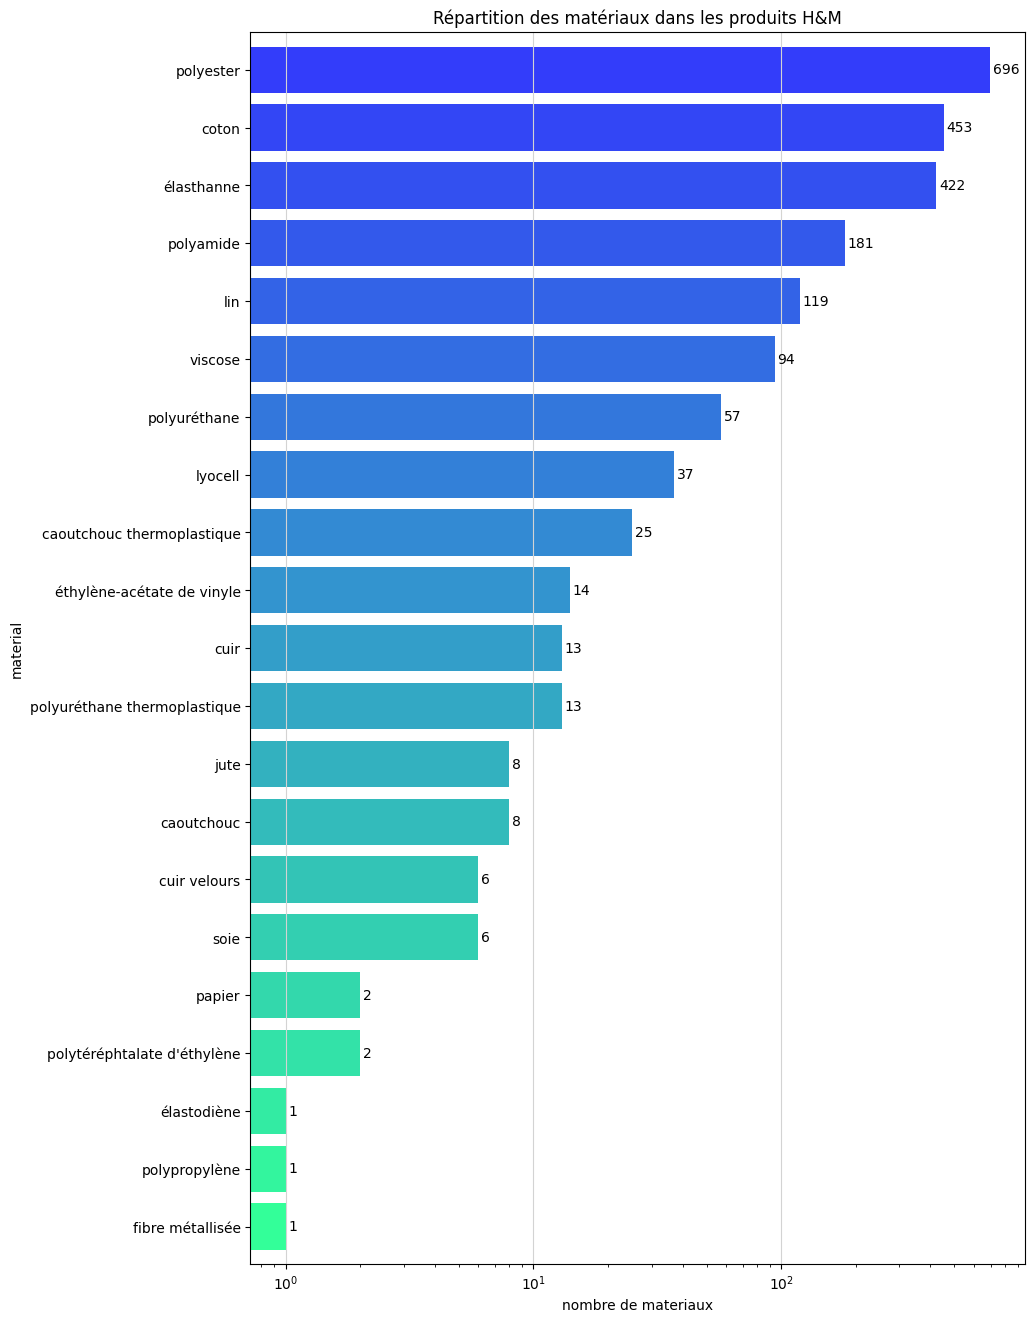

In [125]:
nbre_col_unique = len(df_HM_composition["material"].unique())
cmap = plt.get_cmap('winter_r')
norm = Normalize(vmin=0, vmax=nbre_col_unique)
opts = dict( 
    kind='barh',   #indique que nous allons tracer un graphique en barres horizontales
    width=0.8,     #définit la largeur des barres
    figsize = (10,16), #définit la taille de la figure à 5 pouces de large et 8 pouces de hauteur
    xlabel = 'Liste des matériaux',  #définit l'étiquette de l'axe x
    color = cmap(norm(sorted((list(range(nbre_col_unique)))))), # définit la couleur des barres en utilisant une colormap (cmap) normalisée (norm) basée
    legend = False, #désactive l'affichage de la légende
    alpha = 0.8  #définit la transparence des barres 
)

ax = ( 
    df_HM_composition.groupby("material")
    .size()
    .sort_values(ascending=True)
    .plot(y='nombre de materiaux', **opts)
)

ax.set_xscale("log")
ax.set_xlabel("nombre de materiaux")

ax.bar_label(ax.containers[0],padding=2)
ax.set_title('Répartition des matériaux dans les produits H&M')
ax.grid(axis='x', color='lightgrey', zorder=10)


# H&M suppliers

In [126]:
df_HM_supplier = pd.read_csv("df_suplier.csv")
df_HM_supplier.head()

,Unnamed: 0,Product ID,Country,Company,Factory,Number of Employees
0,0,1166969003,Chine,"SUZHOU LAOHONG KNITTING GARMENT CO.,LTD.","Shandong Wanli Fashion Co.,Ltd Jiu Nv Subsidiary",501-1000
1,1,1142215002,Chine,Yunhan International (HK) Limited,"Suzhou Xijin Fashion Co.,Ltd",101-500
2,2,1159122003,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Serendipity Fashion Co.,ltd",101-500
3,3,1159122001,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Serendipity Fashion Co.,ltd",101-500
4,4,1157667001,Chine,SERENDIPITY INTERNATIONAL TRADING LTD.,"Suhao Eastren Garments Co., Ltd.",101-500


## Clean Data_frame_suppliers

In [127]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_HM_supplier.drop(columns = "Unnamed: 0", inplace = True)

# modifier le type de product_id en string
df_HM_supplier['Product ID'] = df_HM_supplier['Product ID'].astype(str)

#renonmer les colonnes pour enlever les espaces
df_HM_supplier.rename(columns = {'Product ID':'Product_ID', "Number of Employees": "nb_employees"} , inplace = True)

#Mettre les champs en minuscules
df_HM_supplier = df_HM_supplier.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_HM_supplier.rename(columns=lambda x: x.lower(), inplace=True)


df_HM_supplier.head()

,product_id,country,company,factory,nb_employees
0,1166969003,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
1,1142215002,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500
2,1159122003,chine,serendipity international trading ltd.,"serendipity fashion co.,ltd",101-500
3,1159122001,chine,serendipity international trading ltd.,"serendipity fashion co.,ltd",101-500
4,1157667001,chine,serendipity international trading ltd.,"suhao eastren garments co., ltd.",101-500


In [128]:
df_HM_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1291 non-null   object
 1   country       1291 non-null   object
 2   company       1291 non-null   object
 3   factory       1291 non-null   object
 4   nb_employees  1263 non-null   object
dtypes: object(5)
memory usage: 50.6+ KB


## DATA Visualisation

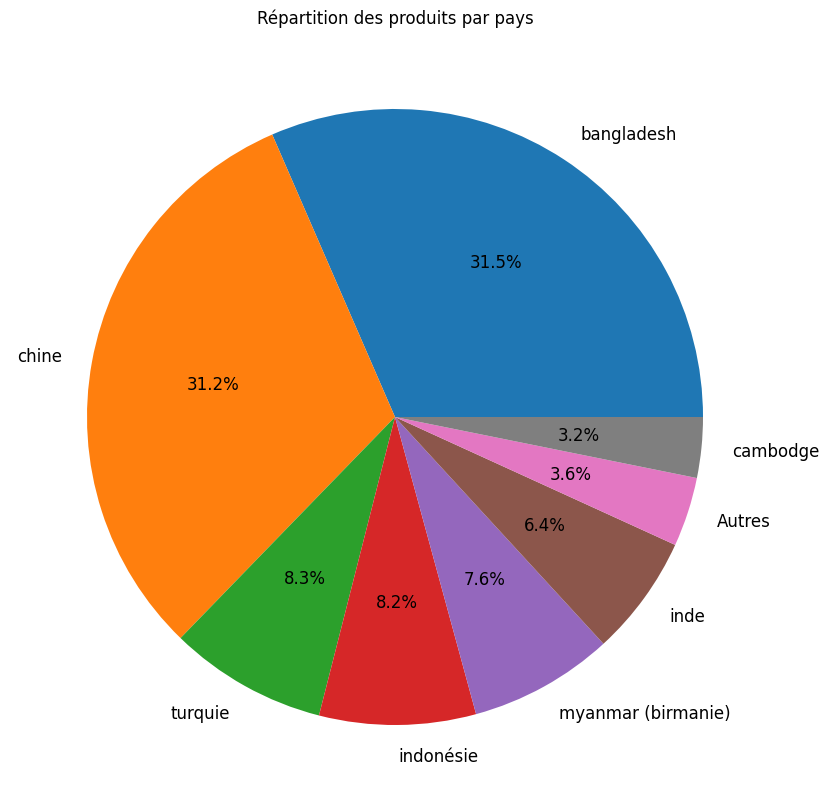

In [129]:
# Regrouper les produits par pays et compter le nombre de produits pour chaque pays
produits_par_pays = (
    df_HM_supplier
    .groupby('country')
    .agg(nombre_produits=("product_id", "count"))
    .reset_index()
)

# Calculer le pourcentage pour chaque tranche
produits_par_pays['pourcentage'] = produits_par_pays['nombre_produits'] / produits_par_pays['nombre_produits'].sum() * 100

# Regrouper les pays avec un pourcentage inférieur à 2% dans une seule catégorie "Autres"
seuil = 2
produits_par_pays.loc[produits_par_pays['pourcentage'] < seuil, 'country'] = 'Autres'
produits_par_pays = (
    produits_par_pays
    .groupby('country')
    .agg(nombre_produits=("nombre_produits", "sum"), pourcentage=("pourcentage", "sum"))
    .sort_values(by = "nombre_produits",ascending = False)
    .reset_index()
)


# Tracer le diagramme circulaire à l'aide de matplotlib
plt.figure(figsize=(10,10))
plt.pie(
    produits_par_pays['nombre_produits'], 
    labels=produits_par_pays['country'], 
    autopct=lambda pct: f"{pct:.1f}%" if pct >= seuil else "",
    textprops={'fontsize': 12}
)
plt.title('Répartition des produits par pays')
plt.show()



# DATA H&M 

In [130]:
df_HM = pd.merge(df_HM_clothes,df_HM_composition,on="product_id",how="inner")

In [131]:
df_HM = pd.merge(df_HM,df_HM_supplier,on = "product_id")

In [132]:
df_HM.head()

,product_id,gender,categories_clothes,color,price,layer,material,percentage,country,company,factory,nb_employees
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500


In [133]:
df_HM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2503 non-null   object 
 1   gender              2503 non-null   object 
 2   categories_clothes  2503 non-null   object 
 3   color               2503 non-null   object 
 4   price               2503 non-null   float64
 5   layer               2503 non-null   object 
 6   material            2503 non-null   object 
 7   percentage          2503 non-null   float64
 8   country             2503 non-null   object 
 9   company             2503 non-null   object 
 10  factory             2503 non-null   object 
 11  nb_employees        2458 non-null   object 
dtypes: float64(2), object(10)
memory usage: 234.8+ KB


In [134]:
# suppression des lignes dupliquée
print(" nous avons", df_HM[df_HM.duplicated()].shape[0], "lignes dupliquées et nous allons les supprimer")
df_HM.drop_duplicates(inplace=True)

 nous avons 28 lignes dupliquées et nous allons les supprimer


In [135]:
print("nous avons scrapé: ",df_HM.product_id.unique().shape[0], "produits différents de H&M, et pour chaque produit "
      "nous avons récupérré les caractéristiques        suivantes : ", df_HM.columns.tolist())

nous avons scrapé:  1025 produits différents de H&M, et pour chaque produit nous avons récupérré les caractéristiques        suivantes :  ['product_id', 'gender', 'categories_clothes', 'color', 'price', 'layer', 'material', 'percentage', 'country', 'company', 'factory', 'nb_employees']


**_Remarque_**: Un produit peut être composé de différents matériaux c'est pour ça que notre dataframe contient 2480 lignes

In [136]:
df_HM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2475 entries, 0 to 2502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2475 non-null   object 
 1   gender              2475 non-null   object 
 2   categories_clothes  2475 non-null   object 
 3   color               2475 non-null   object 
 4   price               2475 non-null   float64
 5   layer               2475 non-null   object 
 6   material            2475 non-null   object 
 7   percentage          2475 non-null   float64
 8   country             2475 non-null   object 
 9   company             2475 non-null   object 
 10  factory             2475 non-null   object 
 11  nb_employees        2430 non-null   object 
dtypes: float64(2), object(10)
memory usage: 251.4+ KB


# DATA HIGG

In [137]:
df_HIGG = pd.read_csv("higgs_score_materials.csv")

In [138]:
df_HIGG.head()

,name,globalWarmingPts,eutrophicationPts,waterScarcityPts,abioticDepletionPts,chemistryPts,impact,waterConsumption,biogenicCarbon
0,Monolithic Laminate,4.518294,0.958347,0.146292,7.888935,4.872923,18.384790,30.981163,0.0000
1,Goose Down Insulation,1.528904,3.918803,0.269525,0.754759,6.928230,13.400220,14.924221,0.8944
2,Duck Down insulation,1.528904,3.918803,0.269525,0.754759,6.928230,13.400220,14.924221,0.0000
3,Iron,2.345487,0.594290,0.036951,1.912598,4.863257,9.752583,7.202557,0.0000
4,Tin,20.558422,59.770568,5.945609,17.582154,5.854645,109.711399,300.507836,0.0000


In [139]:
df_HIGG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 98 non-null     object 
 1   globalWarmingPts     98 non-null     float64
 2   eutrophicationPts    98 non-null     float64
 3   waterScarcityPts     98 non-null     float64
 4   abioticDepletionPts  98 non-null     float64
 5   chemistryPts         98 non-null     float64
 6   impact               98 non-null     float64
 7   waterConsumption     98 non-null     float64
 8   biogenicCarbon       98 non-null     float64
dtypes: float64(8), object(1)
memory usage: 7.0+ KB


In [140]:
#Mettre les champs en minuscules
df_HIGG = df_HIGG.applymap(lambda x: x.lower() if isinstance(x, str) else x)

**_Remarque_:** pour notre étude nous allons se concentré sur les deux colonnes suivante :
({réchauffement global : globalWarmingPts}, {Pénurie d'eau : waterScarcity})

In [141]:
df_HIGG.drop(columns=['eutrophicationPts','biogenicCarbon'
                      ,'abioticDepletionPts','chemistryPts',
                      'impact','waterConsumption','biogenicCarbon'],inplace=True)

In [142]:
df_HIGG.rename(columns = {"globalWarmingPts":"gwp","waterScarcityPts":"wsp"} , inplace=True)

## Worst materials

In [143]:
df_HIGG.sort_values(by = "gwp", ascending = False)

,name,gwp,wsp
26,gold,56902.095183,4378.674859
60,platinum,30509.120357,2328.261832
93,silk fabric,85.890789,350.359242
25,silver,79.823169,15.496375
95,alpaca fabric,78.507524,1.217211
...,...,...,...
63,cardboard,1.298364,0.129650
5,wood,1.086127,0.133077
76,brass,0.905730,0.141338
39,cork,0.556863,0.024996


In [144]:
df_HIGG.sort_values(by = "wsp", ascending = False)

,name,gwp,wsp
26,gold,56902.095183,4378.674859
60,platinum,30509.120357,2328.261832
93,silk fabric,85.890789,350.359242
72,cotton fabric,8.871198,57.328051
74,"acetate, triacetate fabric",18.037614,18.022377
...,...,...,...
18,microporous coating,3.640650,0.074490
3,iron,2.345487,0.036951
39,cork,0.556863,0.024996
38,steel,2.318407,0.019612


# DATA H&M and HIGG

**_Remarque_:** 
nous voulons rajouter les informations (potentiel réchauffement, Pénurie d'eau) dans le dataframe de H&M, la colonne en commun est la colonne matière et name, mais nous avons un problème car les deux colonnes ne sont pas en même langue
donc nous allons suivre les étapes suivante:
1. Créer une table intermédiaire translation_table avec deux colonnes : "fr" et "en", contenant respectivement la traduction de chaque matière en français et en anglais.

2. Effectuer une jointure entre les deux tables table_fr et translation_table sur la colonne "matière" en français, puis une autre jointure entre le résultat de la première jointure et la table table_en sur la colonne "matière" en anglais.

## Construction DataFrame with all informations

In [151]:
# Dictionnaire des correspondances entre les matériaux en français et en anglais
data = {
    'fr': ['caoutchouc', 'caoutchouc thermoplastique', 'coton', 'cuir', 'fibre métallisée', 'jute', 'lin', 'lyocell', 'papier', 'polyamide', 'polyester', 'polypropylène', "polytéréphtalate d'éthylène", 'polyuréthane', 'polyuréthane thermoplastique', 'soie', 'viscose', 'élasthanne', 'élastodiène', 'éthylène-acétate de vinyle'],
    'en': ['natural rubber (nr)', 'thermoplastic elastomer (tpe)', 'cotton fabric', 'cow leather', None, 'jute fiber fabric', 'flax fiber fabric', 'lyocell fabric', 'paper', 'nylon fabric', 'polyester fabric', 'polypropylene (pp) fabric', None, 'polyurethane (pu) fabric', 'thermoplastic polyurethane (tpu) plastic', 'silk fabric', 'viscose/rayon fabric', 'elastane/spandex fabric', None, 'ethylene-vinyl acetate (eva) foam']
}

# Créer un DataFrame avec les colonnes 'fr' et 'en'
translation_table = pd.DataFrame(data)

display(translation_table)


,fr,en
0,caoutchouc,natural rubber (nr)
1,caoutchouc thermoplastique,thermoplastic elastomer (tpe)
2,coton,cotton fabric
3,cuir,cow leather
4,fibre métallisée,None
5,jute,jute fiber fabric
6,lin,flax fiber fabric
7,lyocell,lyocell fabric
8,papier,paper
9,polyamide,nylon fabric


In [152]:
df_HM_en = pd.merge(df_HM,translation_table, left_on = "material", right_on = "fr")

In [153]:
df_HM_en.head()

,product_id,gender,categories_clothes,color,price,layer,material,percentage,country,company,factory,nb_employees,fr,en
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,polyester,polyester fabric
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,polyester,polyester fabric
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,polyester,polyester fabric


In [154]:
df_HM_HIGG = pd.merge(df_HM_en,df_HIGG, left_on = "en",right_on="name")

In [155]:
df_HM_HIGG.drop(columns = ["fr","en","name"], inplace = True )

In [156]:
display(df_HM_HIGG)

,product_id,gender,categories_clothes,color,price,layer,material,percentage,country,company,factory,nb_employees,gwp,wsp
0,1166969003,femme,Hauts,cream/floral,39.99,doublure,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,9.621893,1.281964
1,1166969003,femme,Hauts,cream/floral,39.99,matière principale,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,9.621893,1.281964
2,1166969003,femme,Hauts,cream/floral,39.99,décoration,polyester,100.0,chine,"suzhou laohong knitting garment co.,ltd.","shandong wanli fashion co.,ltd jiu nv subsidiary",501-1000,9.621893,1.281964
3,1142215002,femme,Hauts,noir,49.99,doublure,polyester,100.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,9.621893,1.281964
4,1142215002,femme,Hauts,noir,49.99,matière principale,polyester,61.0,chine,yunhan international (hk) limited,"suzhou xijin fashion co.,ltd",101-500,9.621893,1.281964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1156355001,femme,Hauts,black,149.00,matière principale,soie,37.0,cambodge,tien-hu trading (hong kong) ltd.,m&v (cambodia ) ltd--branch 4,2501-3000,85.890789,350.359242
1985,1139918002,femme,Hauts,blanc,149.00,matière principale,soie,78.0,chine,zhejiang hempelzhi textile technology co. ltd,zhejiang hempelzhi textile technology co. ltd.,501-1000,85.890789,350.359242
1986,818600005,femme,Accessoires,beige/green,12.99,matière principale,papier,100.0,chine,zhejiang kaijia crafts co ltd,"zhejiang kaijia crafts co.,ltd",101-500,0.550030,0.006346
1987,1155396003,femme,Hauts,rose,5.99,matière principale,papier,100.0,bangladesh,aswad composite mills ltd.,aswad composite mills ltd. ( u-2),2001-2500,0.550030,0.006346


# Analyse

## Materials

In [157]:
(
    df_HM_HIGG[["material", "gwp", "wsp"]]
    .drop_duplicates()
    .sort_values(by = "gwp", ascending = False)
)

,material,gwp,wsp
1980,soie,85.890789,350.359242
1649,cuir,34.608943,10.106124
787,viscose,15.867004,3.644619
896,polyamide,15.331537,0.911715
1946,lyocell,13.948158,3.980692
1740,lin,12.639061,3.218400
1662,polyuréthane,10.600350,0.887536
1901,jute,10.102326,6.620588
0,polyester,9.621893,1.281964
1097,coton,8.871198,57.328051


## Layer

In [159]:
(
    df_HM_HIGG
    .groupby(["layer","material"])[["gwp","wsp"]]
    .first()
    .sort_values(by = ["layer","gwp"], ascending = [False, False])
    .groupby("layer")
    .head(3)
)

gwp         wsp
layer              material                           
semelle            cuir          34.608943   10.106124
                   polyuréthane  10.600350    0.887536
                   jute          10.102326    6.620588
matière principale soie          85.890789  350.359242
                   cuir          34.608943   10.106124
                   viscose       15.867004    3.644619
décoration         polyamide     15.331537    0.911715
                   polyester      9.621893    1.281964
                   coton          8.871198   57.328051
doublure           cuir          34.608943   10.106124
                   viscose       15.867004    3.644619
                   polyamide     15.331537    0.911715
accessoires        polyamide     15.331537    0.911715
                   polyester      9.621893    1.281964
                   coton          8.871198   57.328051